## BERT(Bidirectional Encoder Representations from Transformers)

## NLP里的迁移学习

- 使用预训练好的模型来抽取词、句子的特征
    - 例如word2vec或语言模型
- 不更新预训练好的模型
- 需要构建新的网络来抓取新任务需要的信息
    - Word2vec忽略了时序信息，语言模型只看了一个方向
    

## BERT的动机

- 基于微调的NLP模型
- 预训练的模型抽取了足够多的信息
- 新的任务只需要增加一个简单的输出层

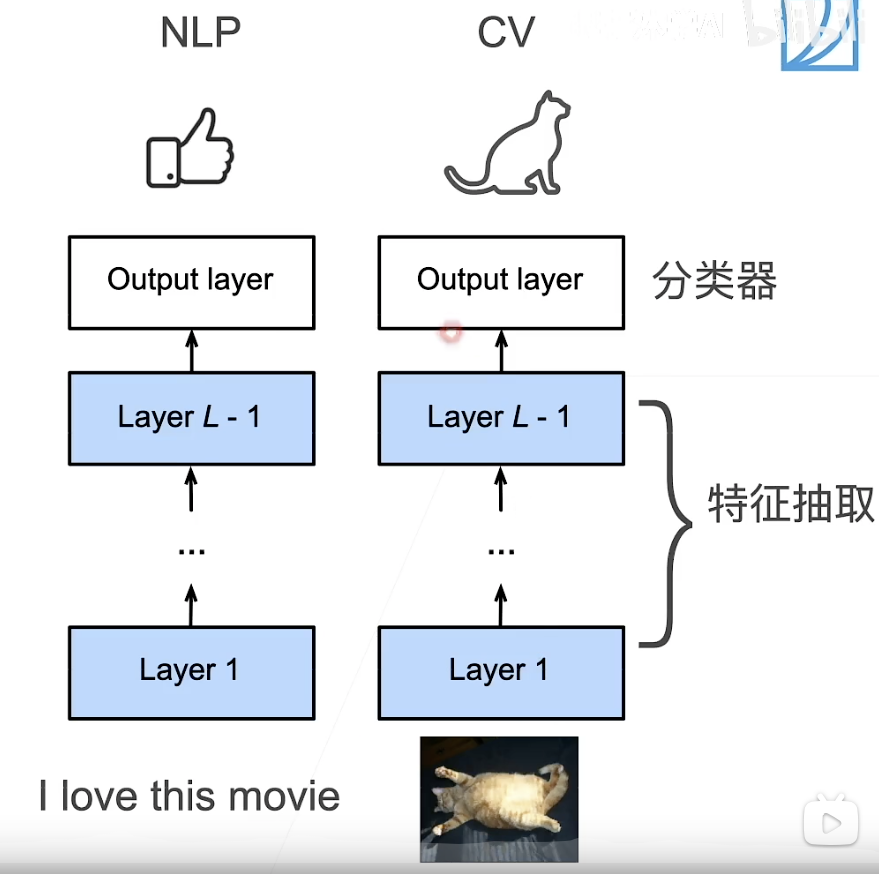

## BERT架构
- 只有编码器的Transformer
- 两个版本：
    - Base：#blocks=12，hidden size=768， #heads=12，#parameters=110M
    - Large： #blocks=24，hidden size=1024，#heads=16， #parameters=340M
- 在大规模数据上训练 > 3B词

## 对输入的修改
- 每个样本是一个句子对
- 加入额外的片段嵌入
- 位置编码可学习

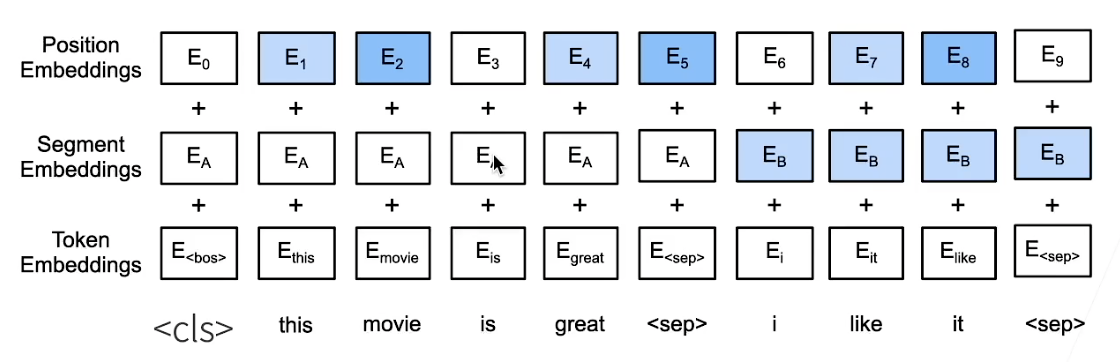

## 预训练任务1： 带掩码的语言模型

- Transformer的编码器是双向，标准语言模型要求单向
- 带掩码的语言模型每次随机（15%）将一些词元换成\<mask\>
- 因为微调任务中不再出现<mask>
    - 80%的概率下，将选中的词元变成<mask>
    - 10%的概率换成一个随机词元
    - 10%概率保持原有的词元
    
## 预训练任务2：下一句子预测
- 预测一个句子对中两个句子是不是相邻
- 训练样本中：
    - 50%概率选择相邻句子对：<cls>this movie is great<sep>i like it<sep>
    - 50%概率选择随机句子对: <cls>this movie is great<sep>hello world<sep>
- 将<cls>对应的输出放到一个全连接层来预测

## 总结

- BERT针对微调设计
- 基于Transformer的编码做了如下修改：
    - 模型更大，训练数据更多
    - 输入句子对，片段嵌入，可学习的位置编码
    - 训练时使用两个任务：
        - 带掩码的语言模型
        - 下一个句子预测